In [2]:
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate
from scipy.interpolate import CubicSpline
from sklearn.metrics import r2_score
from matplotlib.pyplot import cm

In [39]:
def dc_conductivity_plot(Text_dir_curr_k_avg_ac_main,Graph_dir,sigma,freq_no,N,U,mu,Trot,dtau,omega_max,omega_min):

   T_val = np.zeros(len(Trot))
    
   Nden = np.zeros((len(Trot),7))
   Nden_std = np.zeros((len(Trot),7))
   Sigma_dc = np.zeros((len(Trot),7))

   for j in range(len(Trot)):

       T_val[j] = 1/(float(dtau)*float(Trot[j]))

       plt.figure(figsize = (25,20))
       plt.xticks(fontsize = 40)
       plt.yticks(fontsize = 40)
       plt.xlabel(r"$\omega$",fontsize = 40)
       plt.ylabel(r"$\sigma(\omega)$",fontsize = 40)
       
       for i in range(len(U)):

           Text_dir_cond_k = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Current_correlation_functions_analytic_continued_gaussian_sigma_%s_nfreq_%s/k_point_0"%(Text_dir_curr_k_avg_ac_main,N,U[i],dtau,mu,dtau,Trot[j],sigma,freq_no)
           filename_cond_ac_gaus = "%s/Conductivity_momentum_space_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s_k_label_0_gaussian_sigma_%s_nfreq_%s_omega_max_%s_omega_min_%s.dat"%(Text_dir_cond_k,N,U[i],mu,dtau,Trot[j],sigma,str(freq_no),omega_max,omega_min)
           omega,cond_k0 = np.loadtxt(filename_cond_ac_gaus,unpack = 'True',usecols = [0,1])
           plt.plot(omega,cond_k0, marker = "^", markersize = 15, label="U=%s"%U[i])
       plt.xlim(-10,10)
       plt.tight_layout()
       plt.legend(loc = 'best',fontsize = 40)
       plt.grid(True,which='both')
       plt.savefig("%s/Optical_conductivity_gaussian_default_model_sigma_%s_N_%s_mu_%s_dtau_%s_L_%s.png"%(Graph_dir,sigma,N,mu,dtau,Trot[j]))




In [48]:
def main():

    N = 10
    U = ["3.20","3.30","3.40","3.50","3.60","3.70","3.80","3.90","4.00","4.10","4.20","4.30",\
         "4.40","4.50","4.60","4.70","4.80","5.30","5.40","5.50","5.60","5.70","6.00"] #,"4.90","5.00","5.10","5.30","5.40","5.50","5.60","5.70","6.00"]
    Mu = "0.00"
    Trot = ["20","30","40"] #,"50","60"]
    
    Dtau = "0.05"
    Omega_max = "30.0"
    Omega_min = "-30.0"
    Freq_no = 3000
    domega = (float(Omega_max)-float(Omega_min))/Freq_no
    Sigma = "2.0"


    
    Text_dir_cond_k_ac_main = "/Users/roy.369/Documents/Cold_atom_correlators/Text_files_N_%s_analytic_continuation_current_correlations"%N
    Graph_dir_cond = "/Users/roy.369/Documents/Cold_atom_correlators/Maxent_conductivity_gaussian_default_model"
    if not os.path.exists(Graph_dir_cond):
       os.makedirs(Graph_dir_cond)

    dc_conductivity_plot(Text_dir_cond_k_ac_main,Graph_dir_cond,Sigma,Freq_no,N,U,Mu,Trot,Dtau,Omega_max,Omega_min)


    

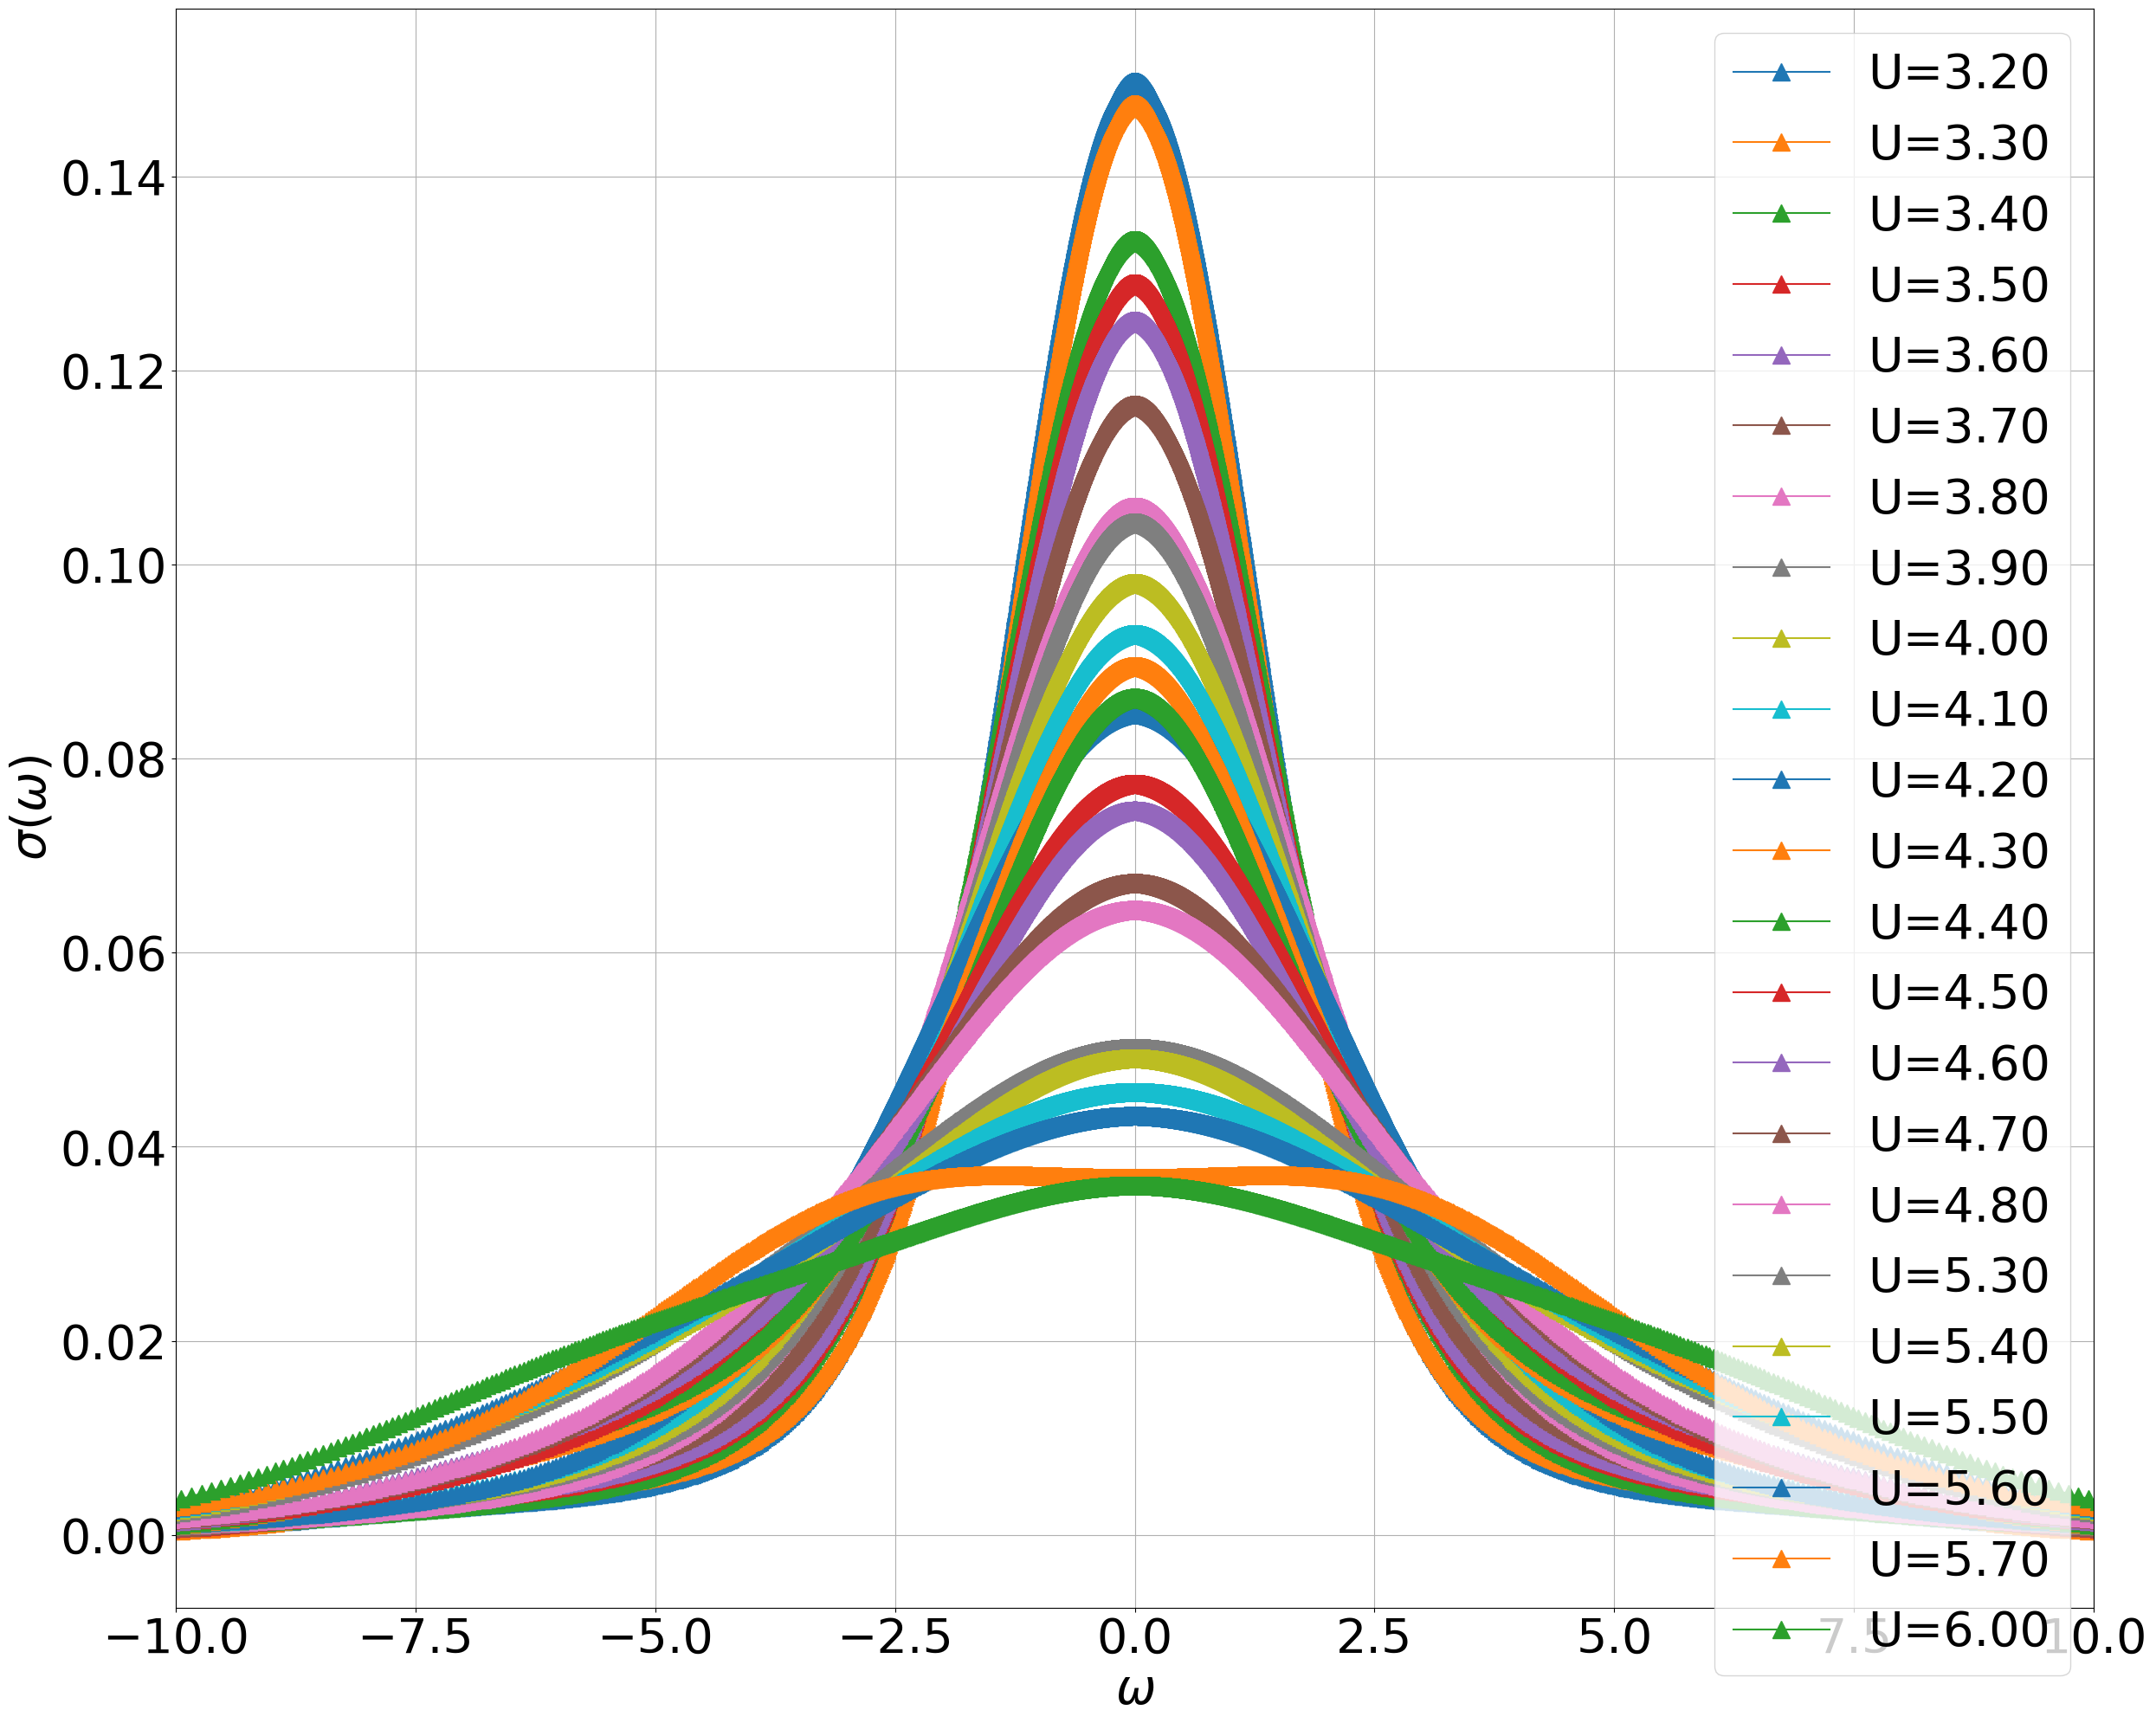

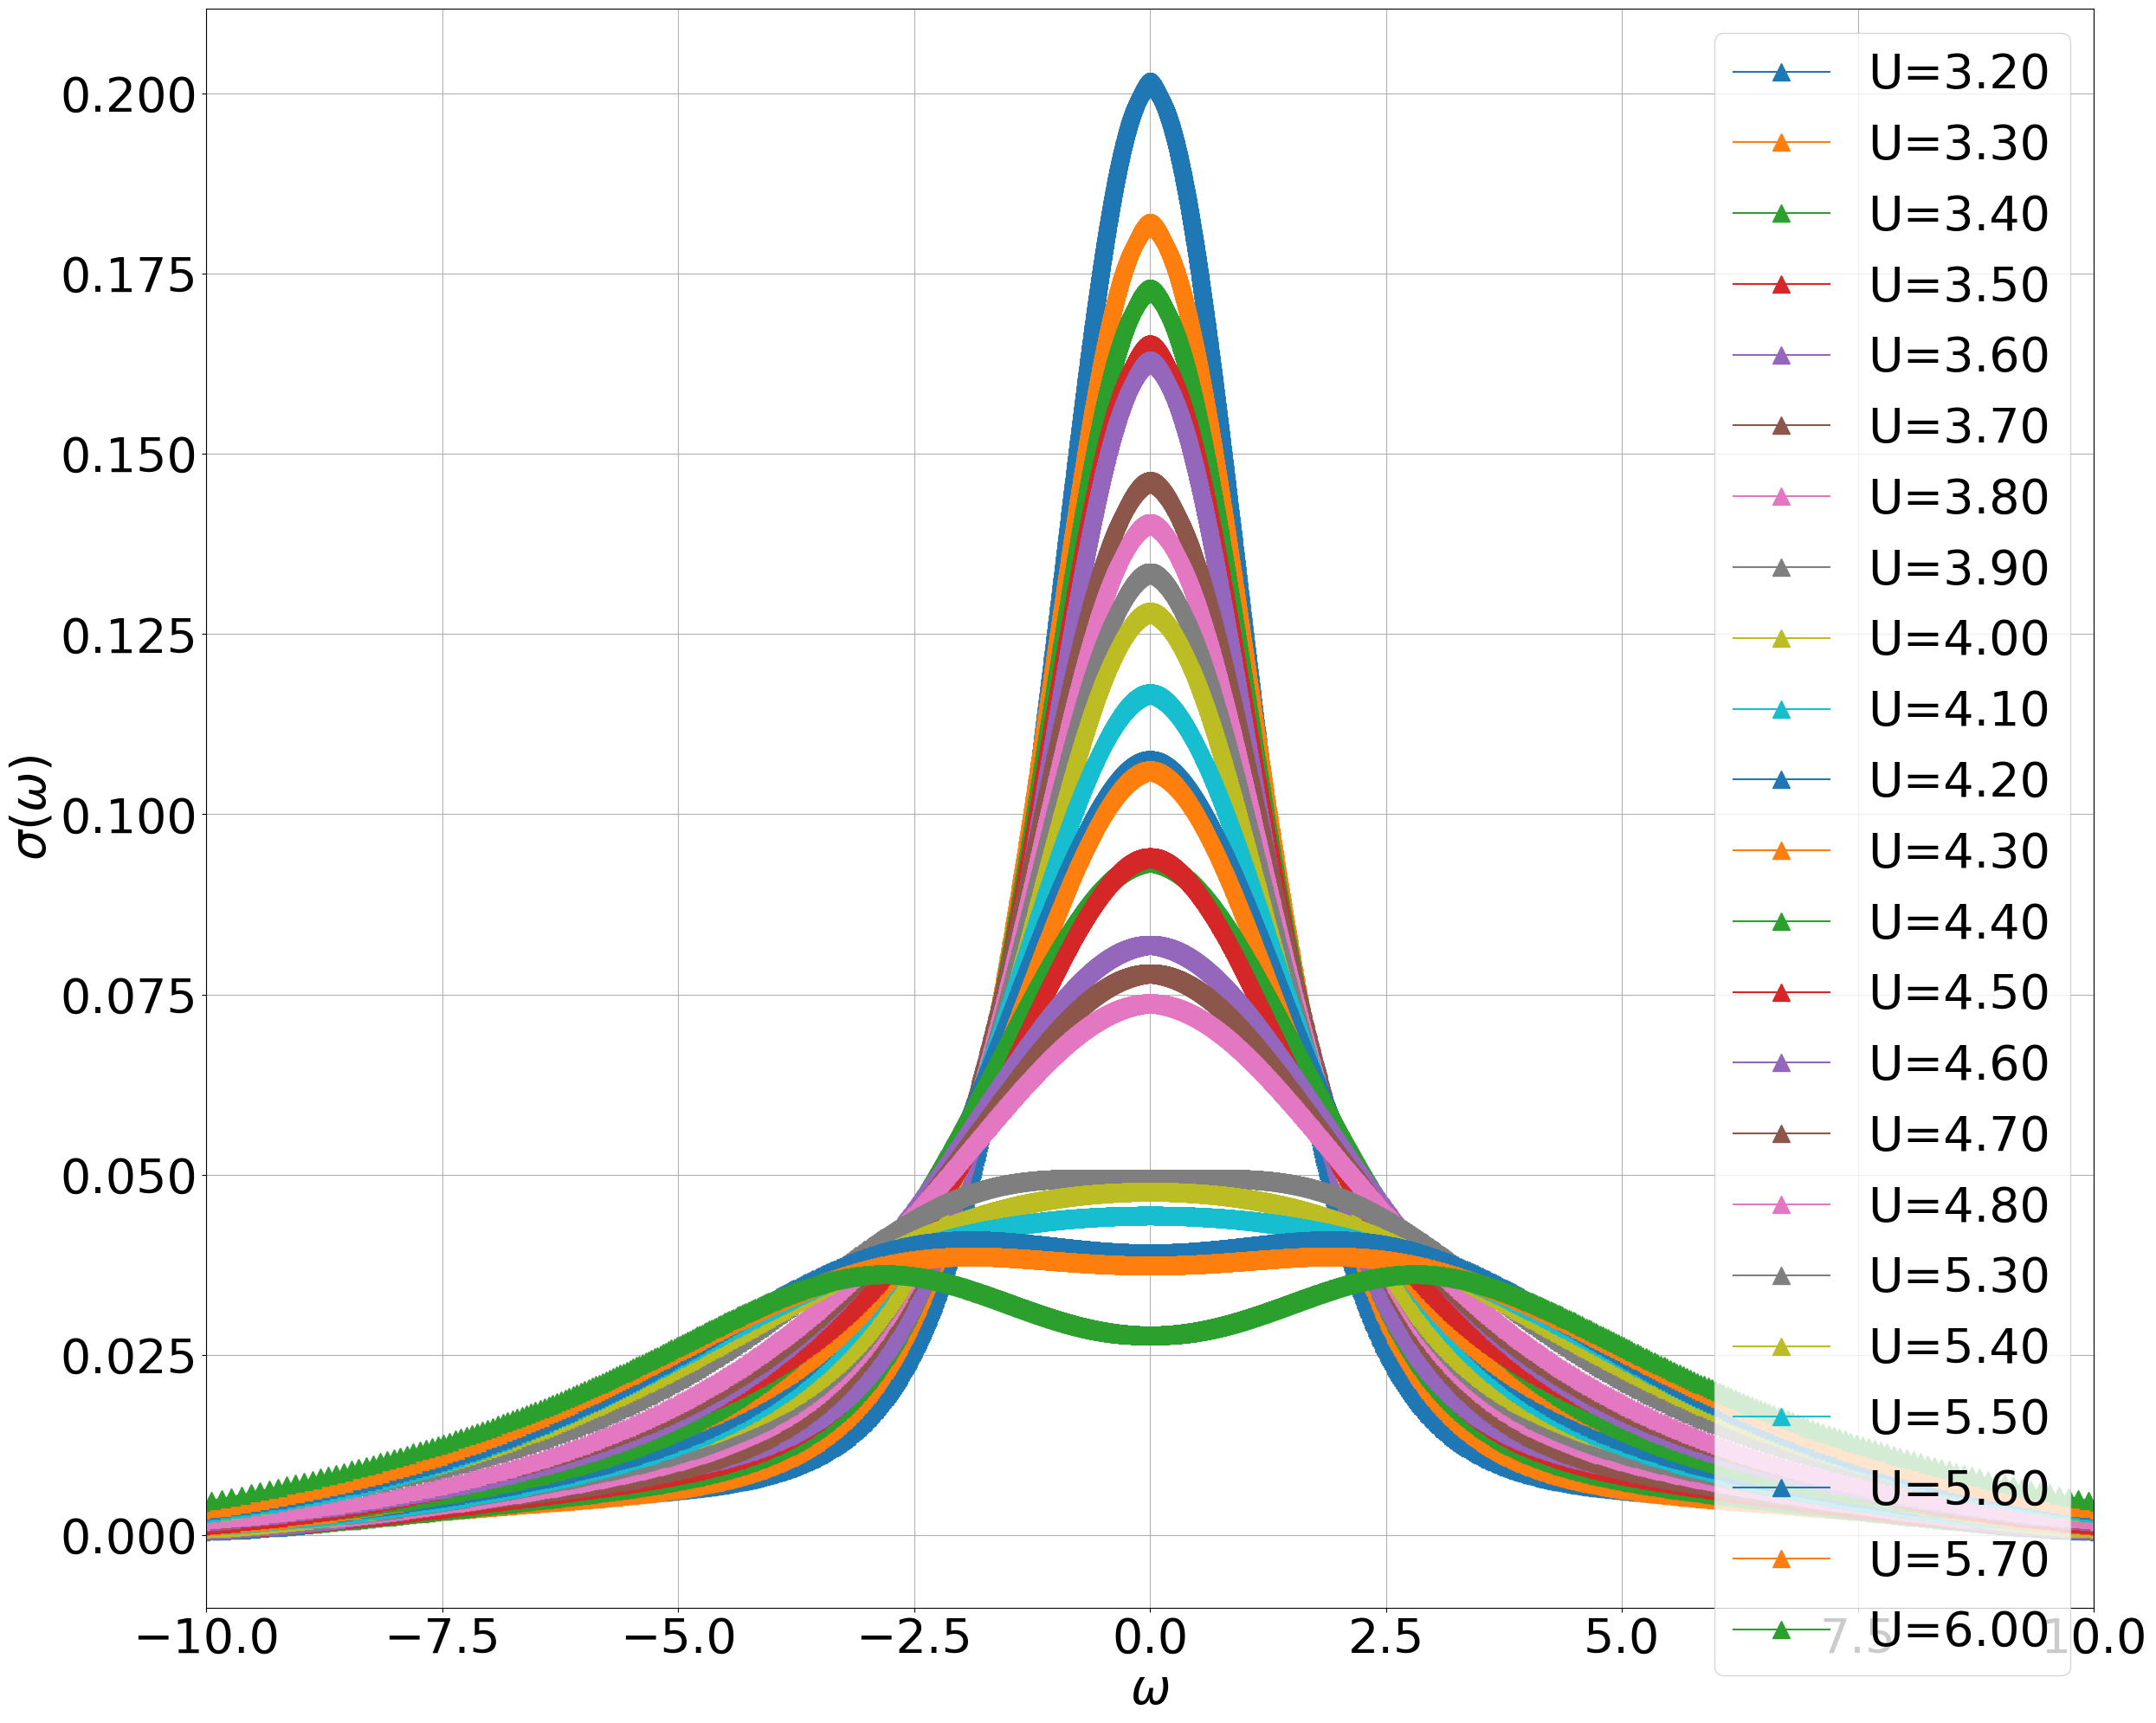

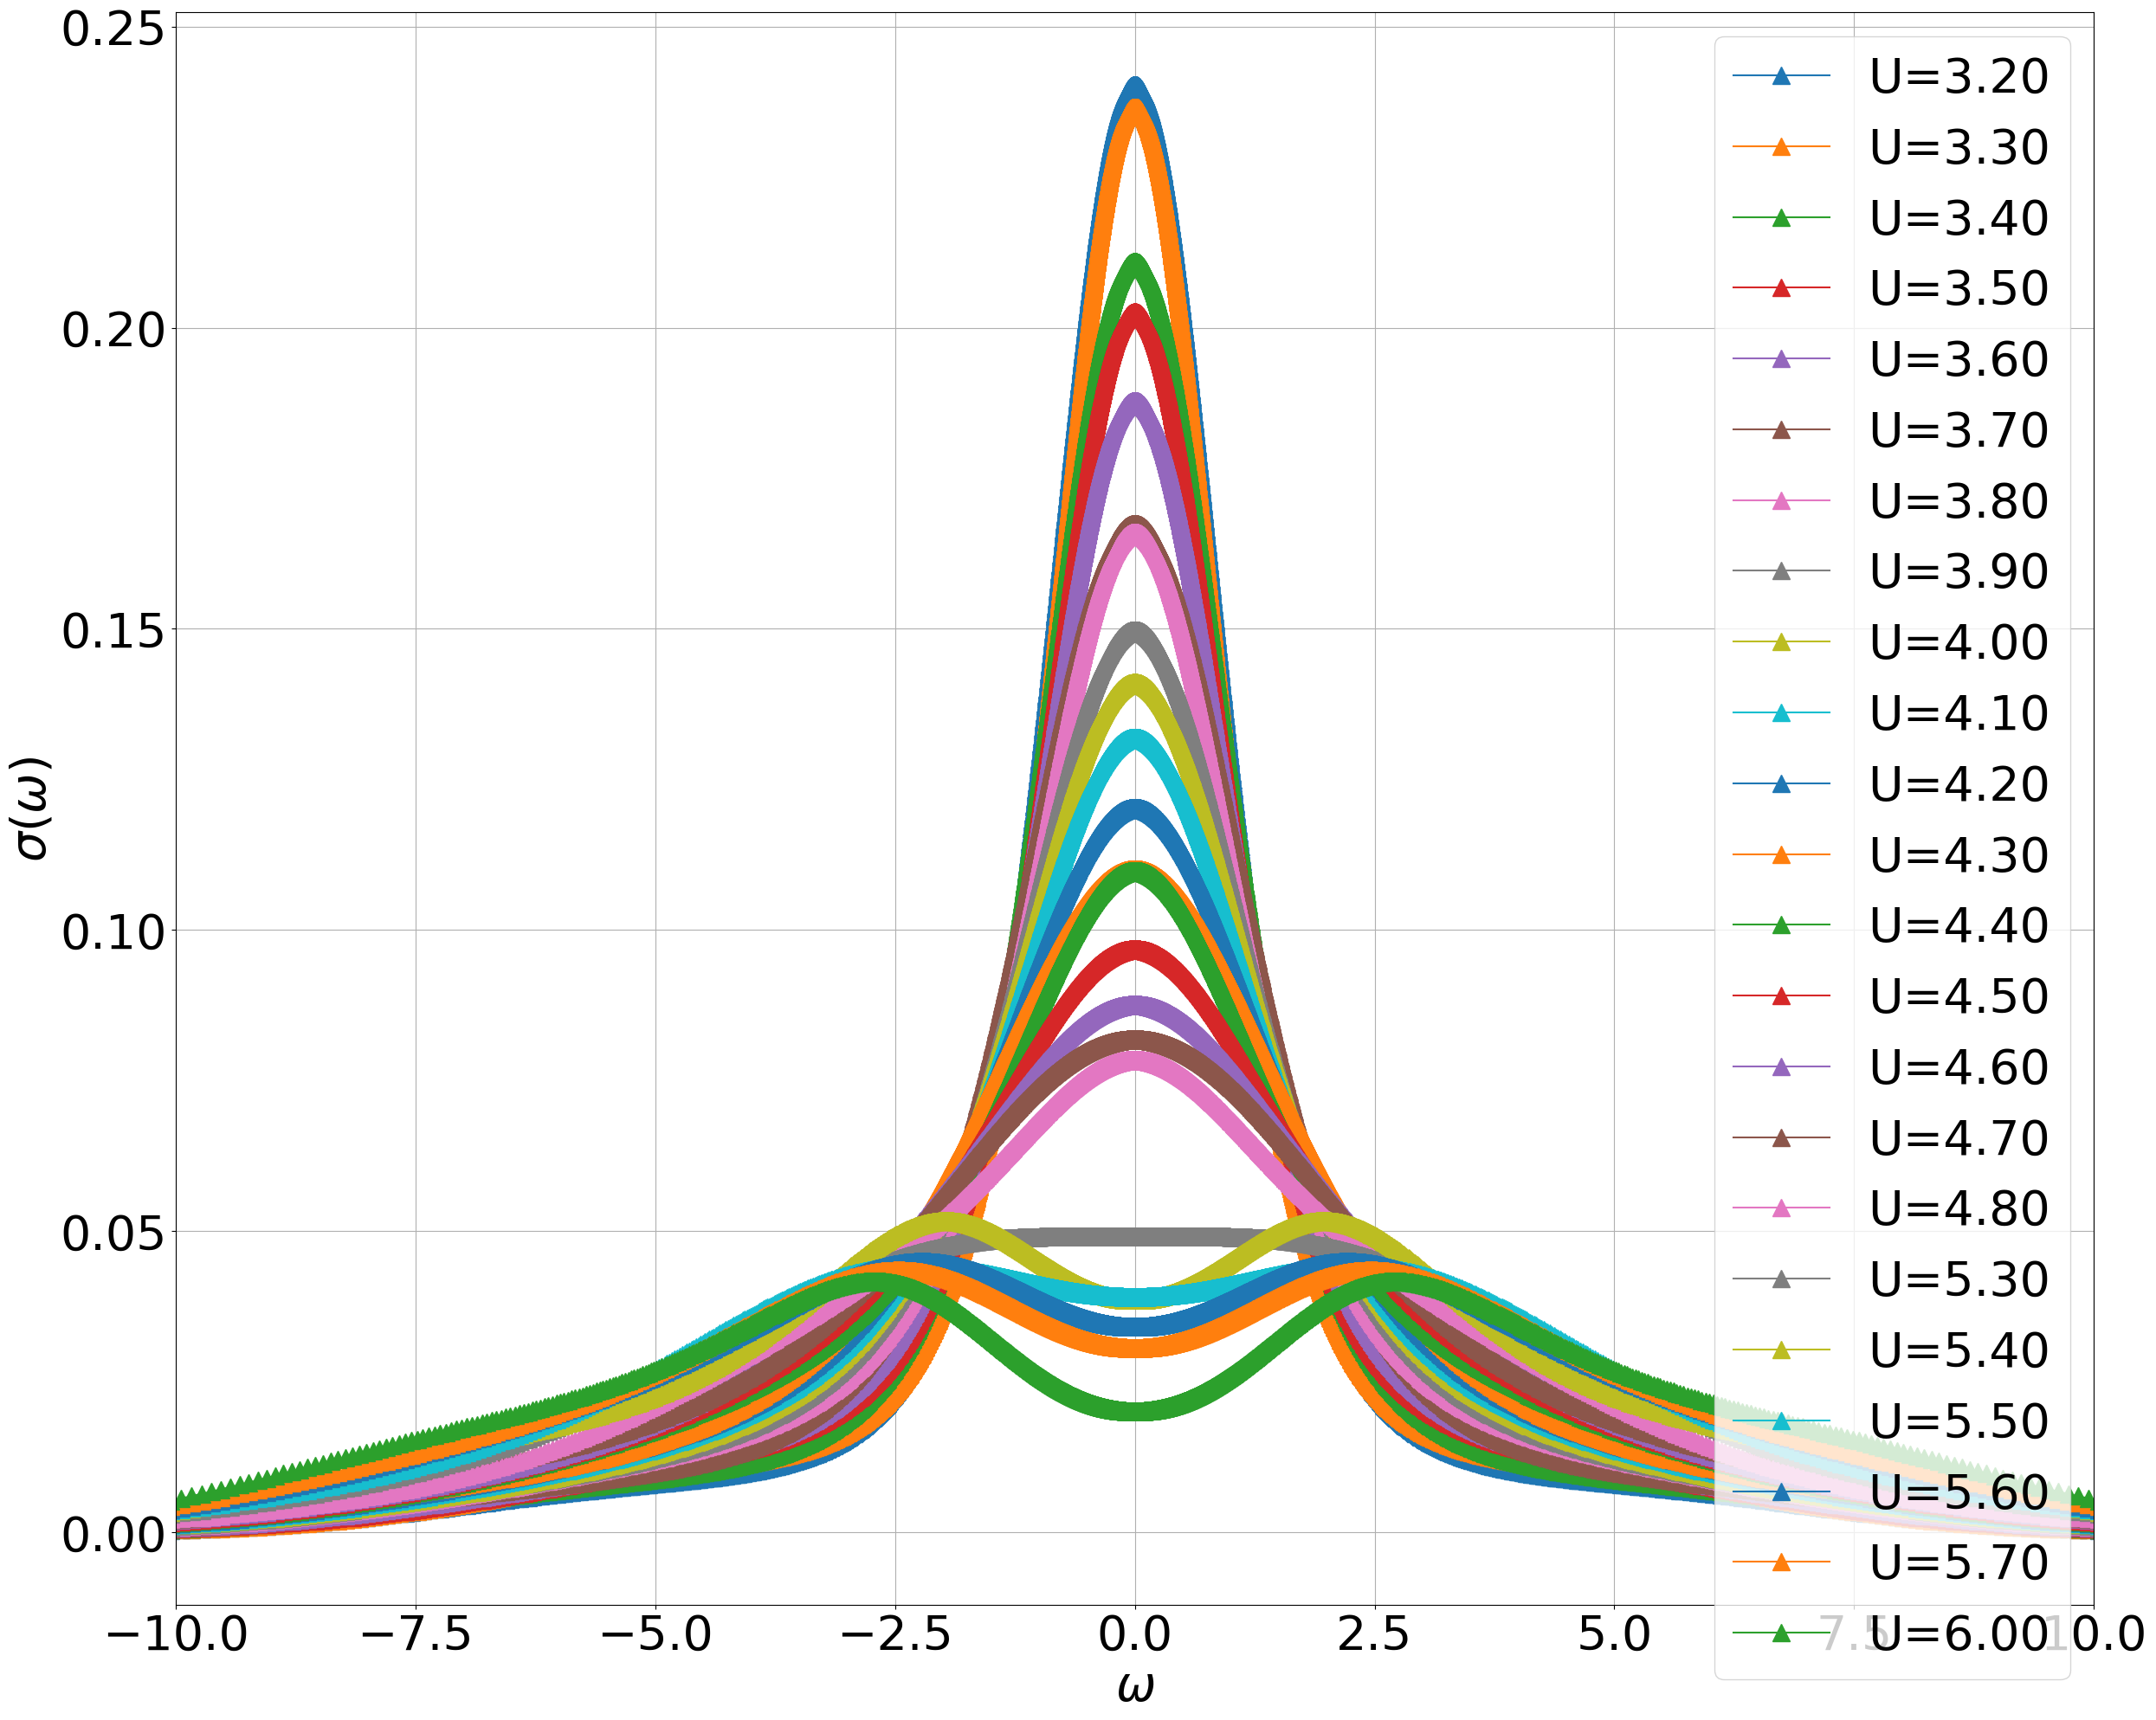

In [49]:
main()